In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
#First few entries of dataset
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- There are missing values as NaN values in the dataset

Attribute Information:

ATTRIBUTES

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area
ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj2 is the variance along the major axis and sigma_min2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.

NUMBER OF CLASSES 3

VAN, BUS, CAR

- The target variable is an object with different models of vehicles 

In [5]:
vehicle_df.describe(include = 'all').transpose()

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

- From the data it seems that there are some missing values for some of the features

In [6]:
vehicle_df.isnull().count()

compactness                    846
circularity                    846
distance_circularity           846
radius_ratio                   846
pr.axis_aspect_ratio           846
max.length_aspect_ratio        846
scatter_ratio                  846
elongatedness                  846
pr.axis_rectangularity         846
max.length_rectangularity      846
scaled_variance                846
scaled_variance.1              846
scaled_radius_of_gyration      846
scaled_radius_of_gyration.1    846
skewness_about                 846
skewness_about.1               846
skewness_about.2               846
hollows_ratio                  846
class                          846
dtype: int64

- There are no null values in the dataset

In [7]:
#Copying the dataset into another dataframe
vehicle_df1 = vehicle_df.copy(deep = True)

In [8]:
vehicle_df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

- There are very few NaN values in the dataset.  Let us replace them with 'zeroes'

- MISSING VALUES 

In [9]:
#Replacing the NaN values with the median values as mean is sensitive to outliers
columns_missingvalue = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
                        'max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity',
                        'max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration',
                        'scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'
                       ]
for i in columns_missingvalue:
    median = vehicle_df1[i].median()
    vehicle_df1[i].replace(np.nan,median,inplace = True)
           
   


In [10]:
vehicle_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

- All missing values are replaced by median values

# Label encoding of Target class

In [11]:
# Label encoding of the target class is done as most of the models require the attributes and target variables to be numbers
vehicle_df1['class'] = pd.Categorical(vehicle_df1['class']).codes

In [12]:
vehicle_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

- After converting the 'class' column to codes, it is converted to int datatype from object which is desirable in modelling also

In [13]:
vehicle_df1.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0        

compactness                       AxesSubplot(0.125,0.749828;0.168478x0.130172)
circularity                    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
distance_circularity           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
radius_ratio                   AxesSubplot(0.731522,0.749828;0.168478x0.130172)
pr.axis_aspect_ratio              AxesSubplot(0.125,0.593621;0.168478x0.130172)
max.length_aspect_ratio        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
scatter_ratio                  AxesSubplot(0.529348,0.593621;0.168478x0.130172)
elongatedness                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
pr.axis_rectangularity            AxesSubplot(0.125,0.437414;0.168478x0.130172)
max.length_rectangularity      AxesSubplot(0.327174,0.437414;0.168478x0.130172)
scaled_variance                AxesSubplot(0.529348,0.437414;0.168478x0.130172)
scaled_variance.1              AxesSubplot(0.731522,0.437414;0.168478x0.130172)
scaled_radius_of_gyration         AxesSu

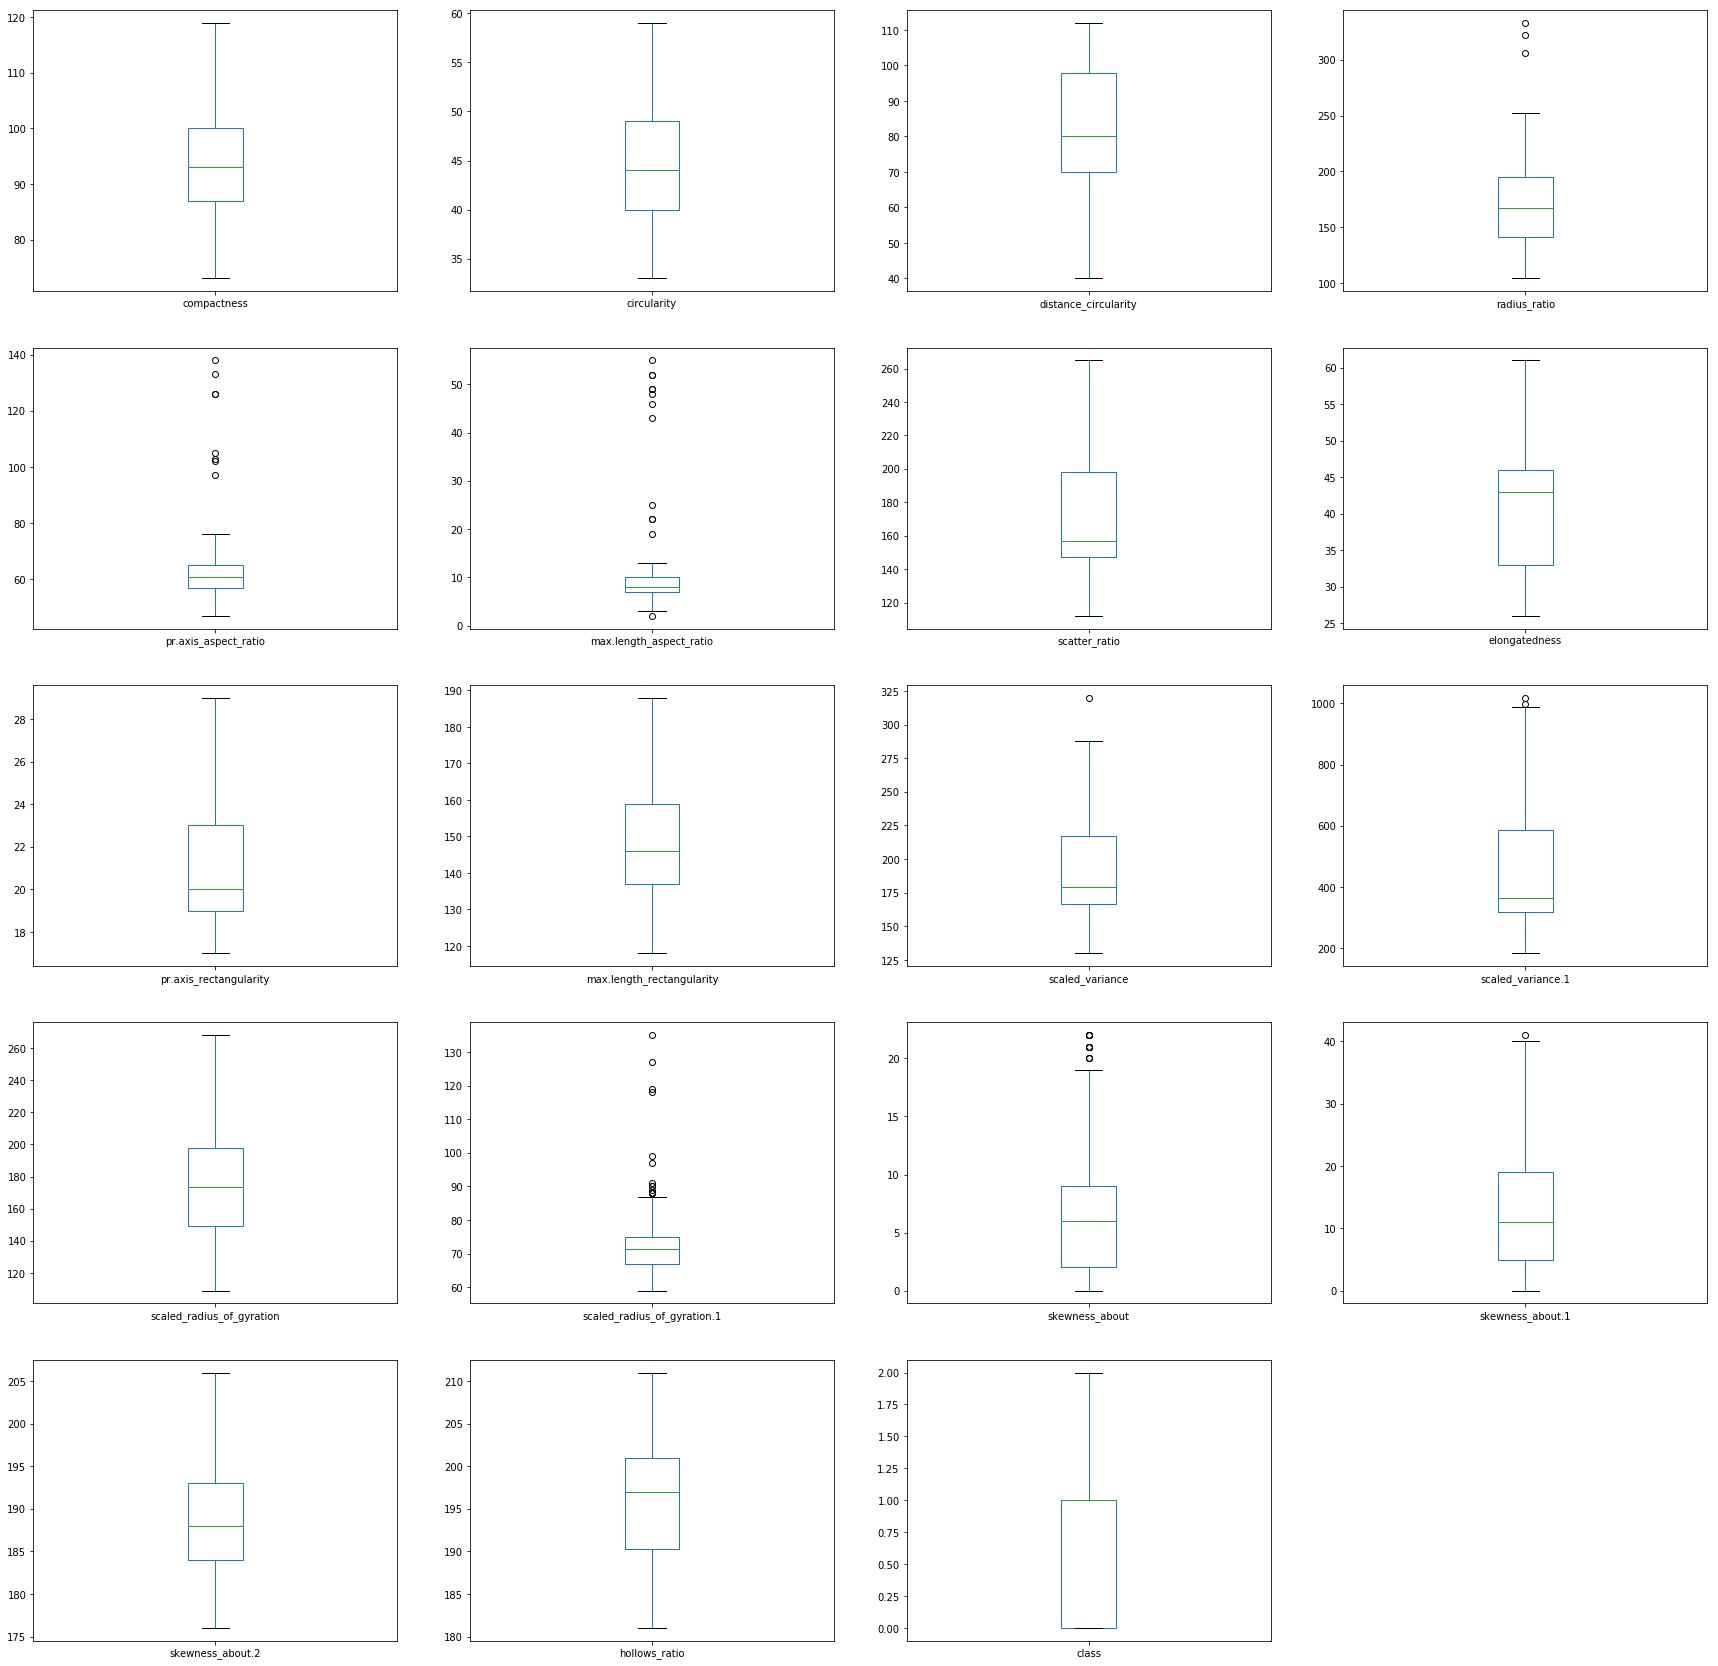

In [14]:
vehicle_df1.plot(kind = 'box',figsize = (30,30),subplots = True, layout = (5,4))

- There are outliers at both the top and the bottom range of box plots in some of the attributes which are to be addressed.  These
  outliers if not attended will influence the models used for prediction.  Hence, letus replace these outliers with the median values
    which willnot effect the distribution also.

# DEALING WITH OUTLIERS

In [15]:
columns_outlier = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
                   'max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity',
                   'max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration',
                   'scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'
                  ]
for i in columns_outlier:
    dp75, dp25 = np.percentile(vehicle_df1[i], [75 ,25])
    IQR = dp75 - dp25
    Up_range = dp75 + 1.5*IQR
    Low_range = dp25 - 1.5*IQR
    median = vehicle_df1[i].median()
    print('Number of upper range outliers is : ' ,vehicle_df1[vehicle_df1[i] > Up_range][i].shape[0])
    print('Number of Lower range outliers is : ' , vehicle_df1[vehicle_df1[i] < Low_range][i].shape[0])
    vehicle_df1.loc[(vehicle_df1[i] > Up_range),i] = median
    vehicle_df1.loc[(vehicle_df1[i] < Low_range),i] = median
    print('All outliers are replaced of ', i)
    print('*'*100)
    
    
    
    
    


Number of upper range outliers is :  0
Number of Lower range outliers is :  0
All outliers are replaced of  compactness
****************************************************************************************************
Number of upper range outliers is :  0
Number of Lower range outliers is :  0
All outliers are replaced of  circularity
****************************************************************************************************
Number of upper range outliers is :  0
Number of Lower range outliers is :  0
All outliers are replaced of  distance_circularity
****************************************************************************************************
Number of upper range outliers is :  3
Number of Lower range outliers is :  0
All outliers are replaced of  radius_ratio
****************************************************************************************************
Number of upper range outliers is :  8
Number of Lower range outliers is :  0
All outliers are replaced of

- All the outliers are replaced with median values as it doesnot effect the distribution of these variables

In [16]:
# Viewing the dataframe after eliminating outliers by replacing with median values
vehicle_df1.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         71.5             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0      2  
1             189.0          199.0      2  
2             188.0          196.0      1  
3             199.0          207.0      2  
4             180.0        

compactness                       AxesSubplot(0.125,0.749828;0.168478x0.130172)
circularity                    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
distance_circularity           AxesSubplot(0.529348,0.749828;0.168478x0.130172)
radius_ratio                   AxesSubplot(0.731522,0.749828;0.168478x0.130172)
pr.axis_aspect_ratio              AxesSubplot(0.125,0.593621;0.168478x0.130172)
max.length_aspect_ratio        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
scatter_ratio                  AxesSubplot(0.529348,0.593621;0.168478x0.130172)
elongatedness                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
pr.axis_rectangularity            AxesSubplot(0.125,0.437414;0.168478x0.130172)
max.length_rectangularity      AxesSubplot(0.327174,0.437414;0.168478x0.130172)
scaled_variance                AxesSubplot(0.529348,0.437414;0.168478x0.130172)
scaled_variance.1              AxesSubplot(0.731522,0.437414;0.168478x0.130172)
scaled_radius_of_gyration         AxesSu

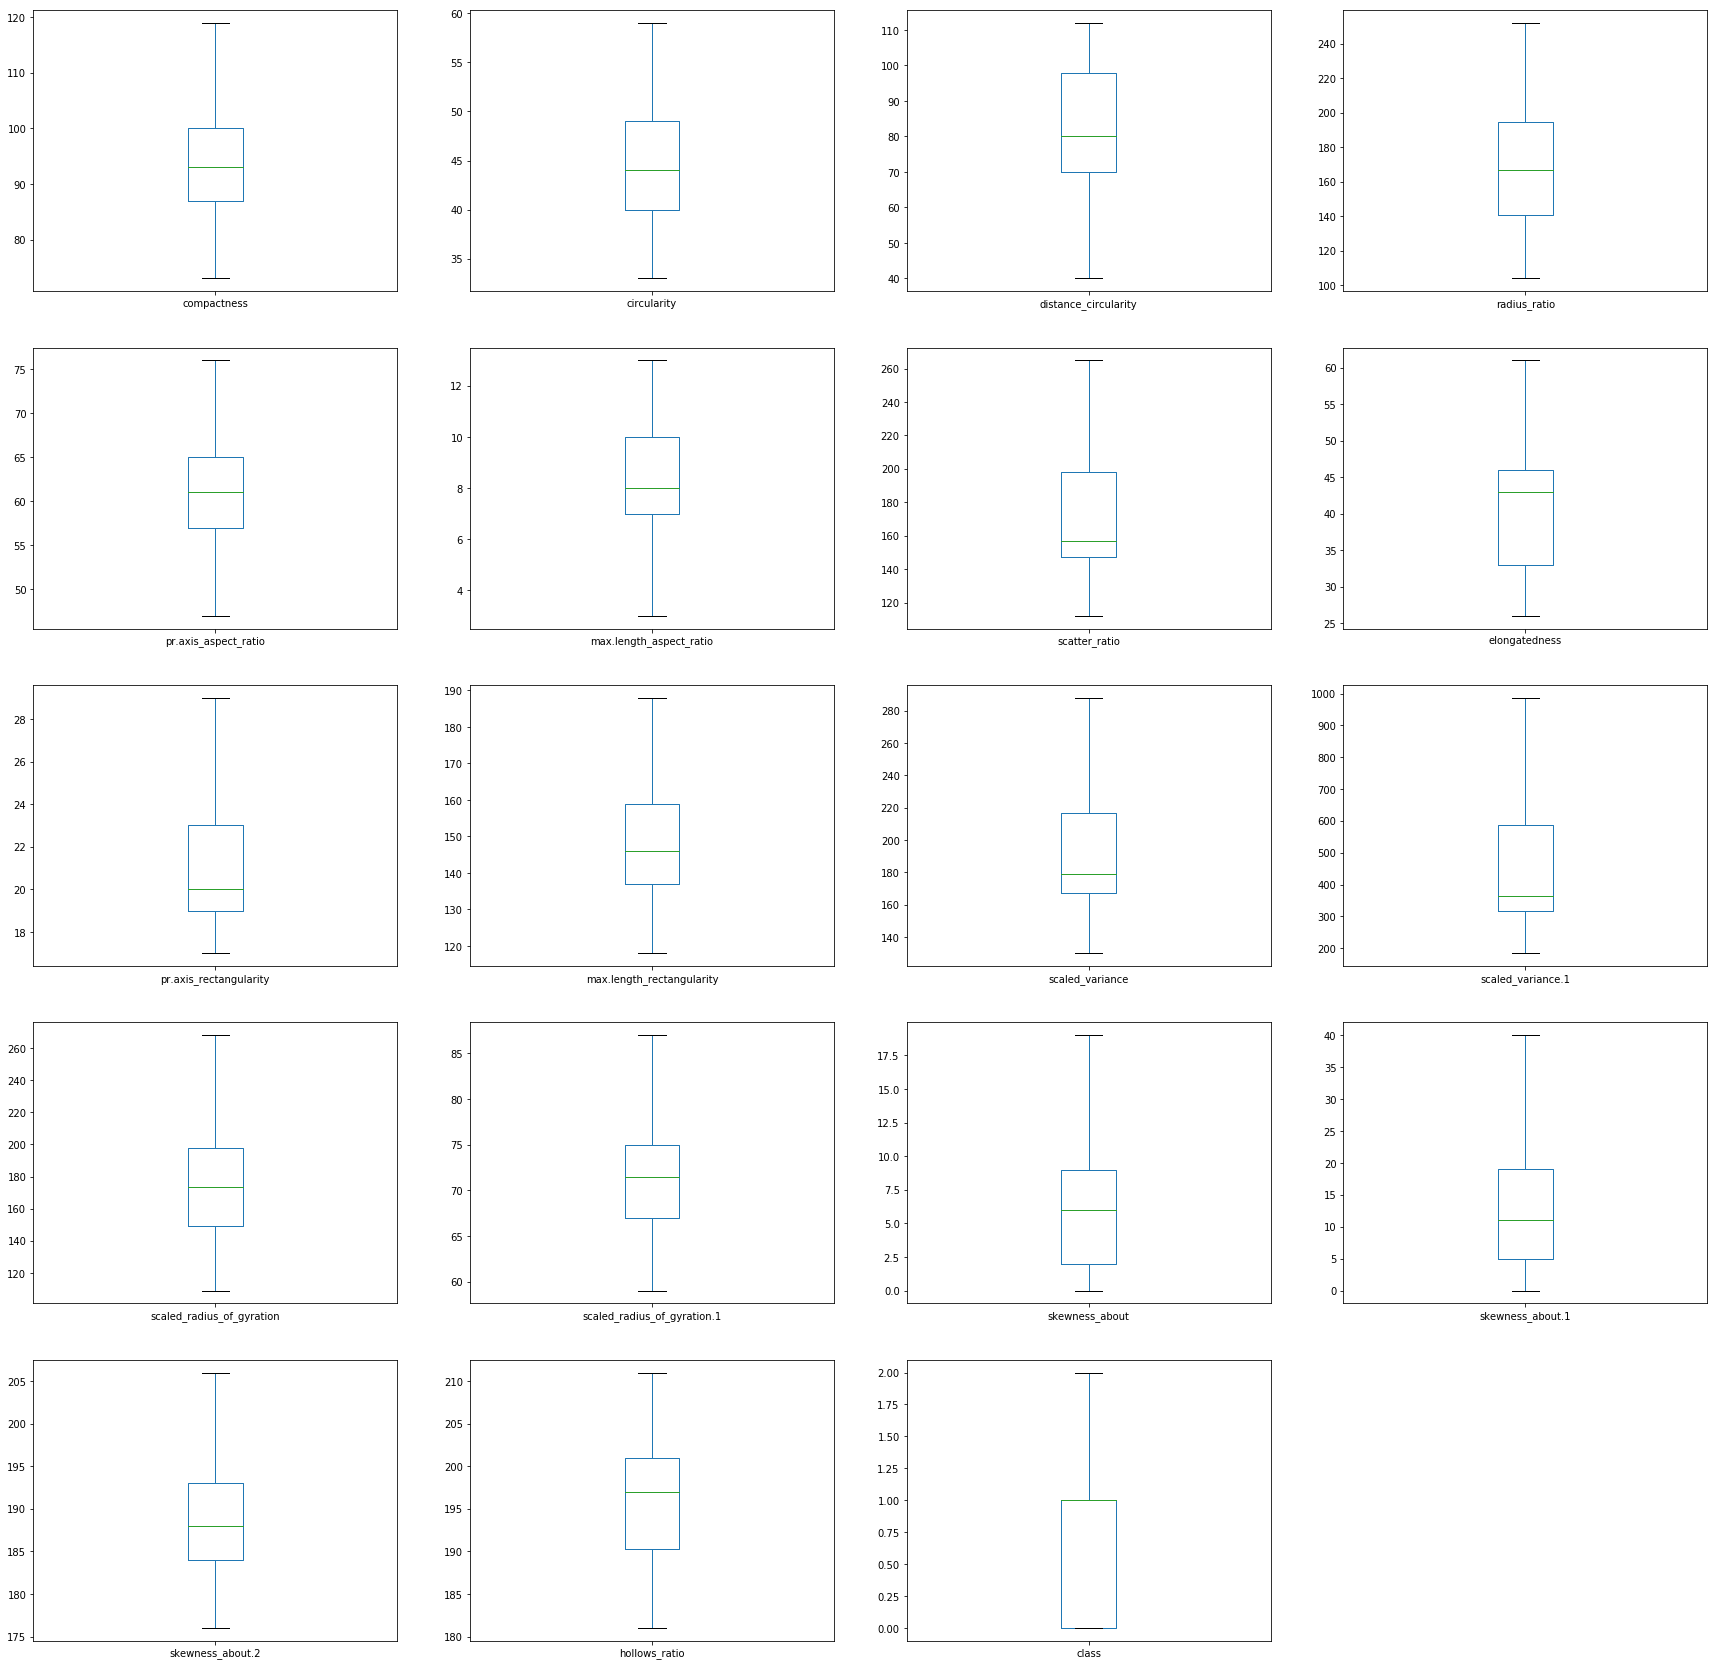

In [17]:
# Checking boxplots for removal of outliers
vehicle_df1.plot(kind = 'box',figsize = (30,30),subplots = True, layout = (5,4))

- All outliers are replaced and there are no outliers as depicted by above boxplots

- NORMALIZATION OF DATA

In [18]:
#For processing of data
from sklearn import preprocessing

In [19]:
x_array = np.array(vehicle_df1['compactness'])
norm_compactness = preprocessing.normalize([x_array])

x_array1 = np.array(vehicle_df1['circularity'])
norm_circularity = preprocessing.normalize([x_array1])

x_array2 = np.array(vehicle_df1['distance_circularity'])
norm_distance_circularity = preprocessing.normalize([x_array2])

x_array3 = np.array(vehicle_df1['radius_ratio'])
norm_radius_ratio = preprocessing.normalize([x_array3])

x_array4 = np.array(vehicle_df1['pr.axis_aspect_ratio'])
norm_praxis_aspect_ratio = preprocessing.normalize([x_array4])

x_array5 = np.array(vehicle_df1['max.length_aspect_ratio'])
norm_maxlength_aspect_ratio = preprocessing.normalize([x_array5])

x_array6 = np.array(vehicle_df1['scatter_ratio'])
norm_scatter_ratio = preprocessing.normalize([x_array6])

x_array7 = np.array(vehicle_df1['elongatedness'])
norm_elongatedness = preprocessing.normalize([x_array7])

x_array8 = np.array(vehicle_df1['pr.axis_rectangularity'])
norm_praxis_rectangularity = preprocessing.normalize([x_array8])

x_array9 = np.array(vehicle_df1['max.length_rectangularity'])
norm_maxlength_rectangularity = preprocessing.normalize([x_array9])

x_array10 = np.array(vehicle_df1['scaled_variance'])
norm_scaled_variance = preprocessing.normalize([x_array10])

x_array11 = np.array(vehicle_df1['scaled_variance.1'])
norm_scaled_variance1 = preprocessing.normalize([x_array11])

x_array12 = np.array(vehicle_df1['scaled_radius_of_gyration'])
norm_scaled_radius_of_gyration = preprocessing.normalize([x_array12])

x_array13 = np.array(vehicle_df1['scaled_radius_of_gyration.1'])
norm_scaled_radius_of_gyration1 = preprocessing.normalize([x_array13])

x_array14 = np.array(vehicle_df1['skewness_about'])
norm_skewness_about = preprocessing.normalize([x_array14])

x_array15 = np.array(vehicle_df1['skewness_about.1'])
norm_skewness_about1 = preprocessing.normalize([x_array15])

x_array16 = np.array(vehicle_df1['skewness_about.2'])
norm_skewness_about2 = preprocessing.normalize([x_array16])

x_array17 = np.array(vehicle_df1['hollows_ratio'])
norm_hollows_ratio = preprocessing.normalize([x_array17])

x_array18 = np.array(vehicle_df1['class'])




In [20]:
vehicle_df_norm =   pd.DataFrame({'compactness': norm_compactness[0,:], 'circularity': norm_circularity[0,:], 'distance_circularity': norm_distance_circularity[0,:], 'radius_ratio': norm_radius_ratio[0,:], 
                                 'pr.axis_aspect_ratio' : norm_praxis_aspect_ratio[0,:], 'max.length_aspect_ratio' : norm_maxlength_aspect_ratio[0,:], 'scatter_ratio' : norm_scatter_ratio[0,:], 
                                 'elongatedness' : norm_elongatedness[0,:], 'pr.axis_rectangularity' : norm_praxis_rectangularity[0,:], 'max.length_rectangularity' : norm_maxlength_rectangularity[0,:], 
                                 'scaled_variance' : norm_scaled_variance[0,:], 'scaled_variance.1' : norm_scaled_variance1[0,:], 'scaled_radius_of_gyration' : norm_scaled_radius_of_gyration[0,:], 
                                 'scaled_radius_of_gyration.1' : norm_scaled_radius_of_gyration1[0,:], 'skewness_about' : norm_skewness_about[0,:],'skewness_about.1' : norm_skewness_about1[0,:],
                                 'skewness_about.2' : norm_skewness_about2[0,:], 'hollows_ratio' : norm_hollows_ratio[0,:], 'class' : x_array18
                                 })

vehicle_df_norm.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.034732     0.036477              0.034136      0.035711   
1     0.033270     0.031158              0.034548      0.028288   
2     0.038022     0.037997              0.043596      0.041930   
3     0.034001     0.031158              0.033725      0.031899   
4     0.031076     0.033437              0.028790      0.041128   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.040309                 0.041046       0.032360   
1              0.031911                 0.036941       0.029763   
2              0.036949                 0.041046       0.041349   
3              0.035270                 0.036941       0.028764   
4              0.034150                 0.032837       0.029763   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.034650                0.033150                   0.036760   
1       0.037125                0.031493                   0.033061   
2       0.026400                0.038123                   0.036529   
3       0.037950                0.031493                   0.033061   
4       0.037125                0.031493                   0.033292   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.031686           0.027654                   0.035598   
1         0.030606           0.024079                   0.030568   
2         0.040148           0.046333                   0.042563   
3         0.028806           0.022546                   0.024570   
4         0.043389           0.023714                   0.036372   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.033330        0.026929          0.035763   
1                     0.034282        0.040393          0.031292   
2                     0.034758        0.062833          0.020117   
3                     0.029997        0.026929          0.022352   
4                     0.034044        0.040393          0.024587   

   skewness_about.2  hollows_ratio  class  
0          0.034014       0.034596      2  
1          0.034377       0.034947      2  
2          0.034195       0.034420      1  
3          0.036196       0.036352      2  
4          0.032740       0.032137      0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE619016D8>,
      dtype=object)

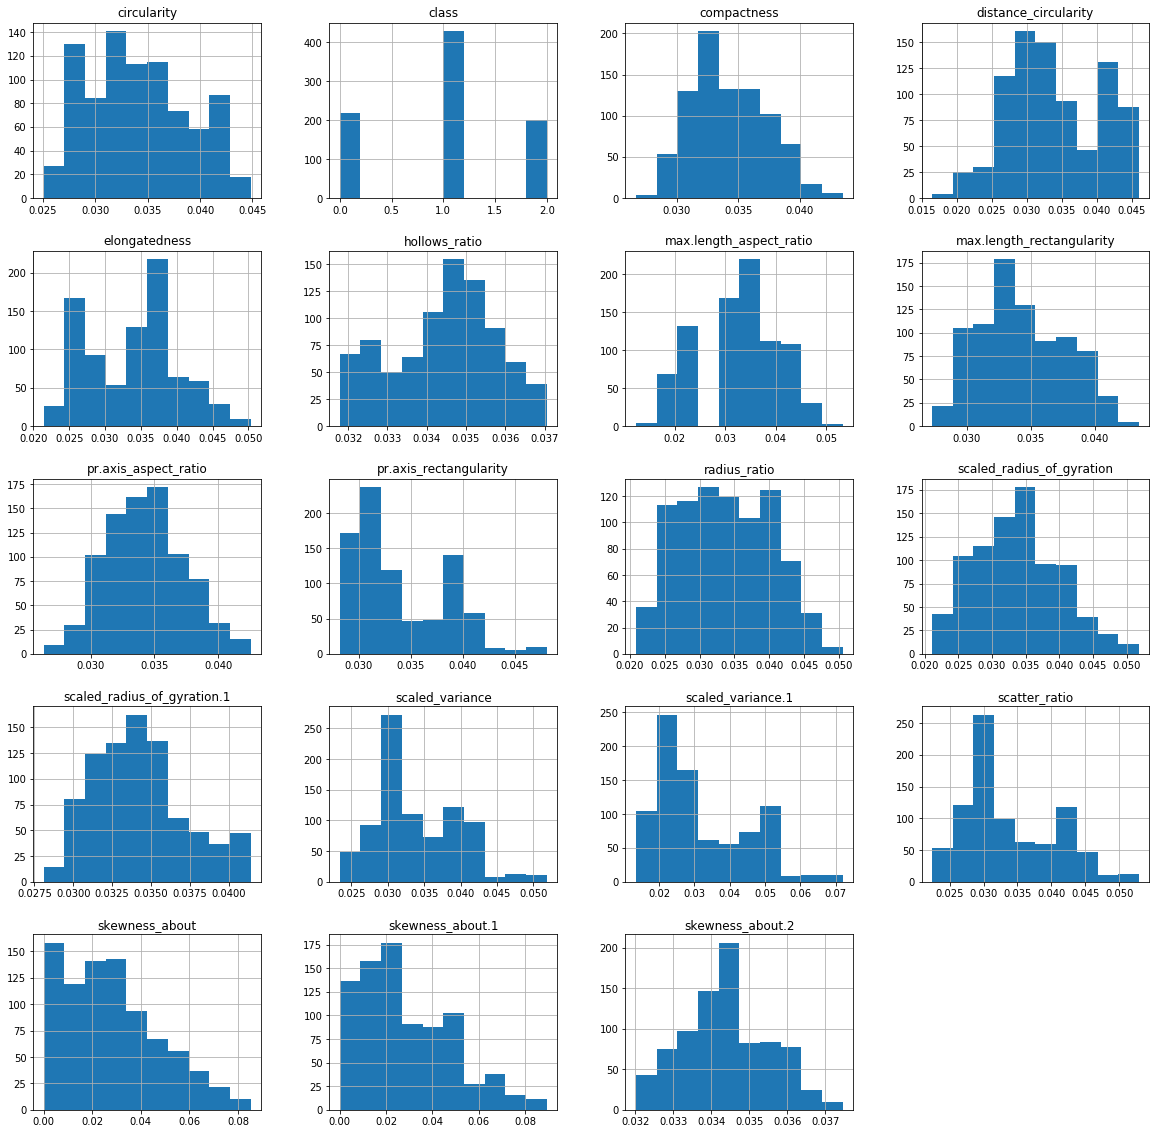

In [21]:
vehicle_df_norm.hist(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

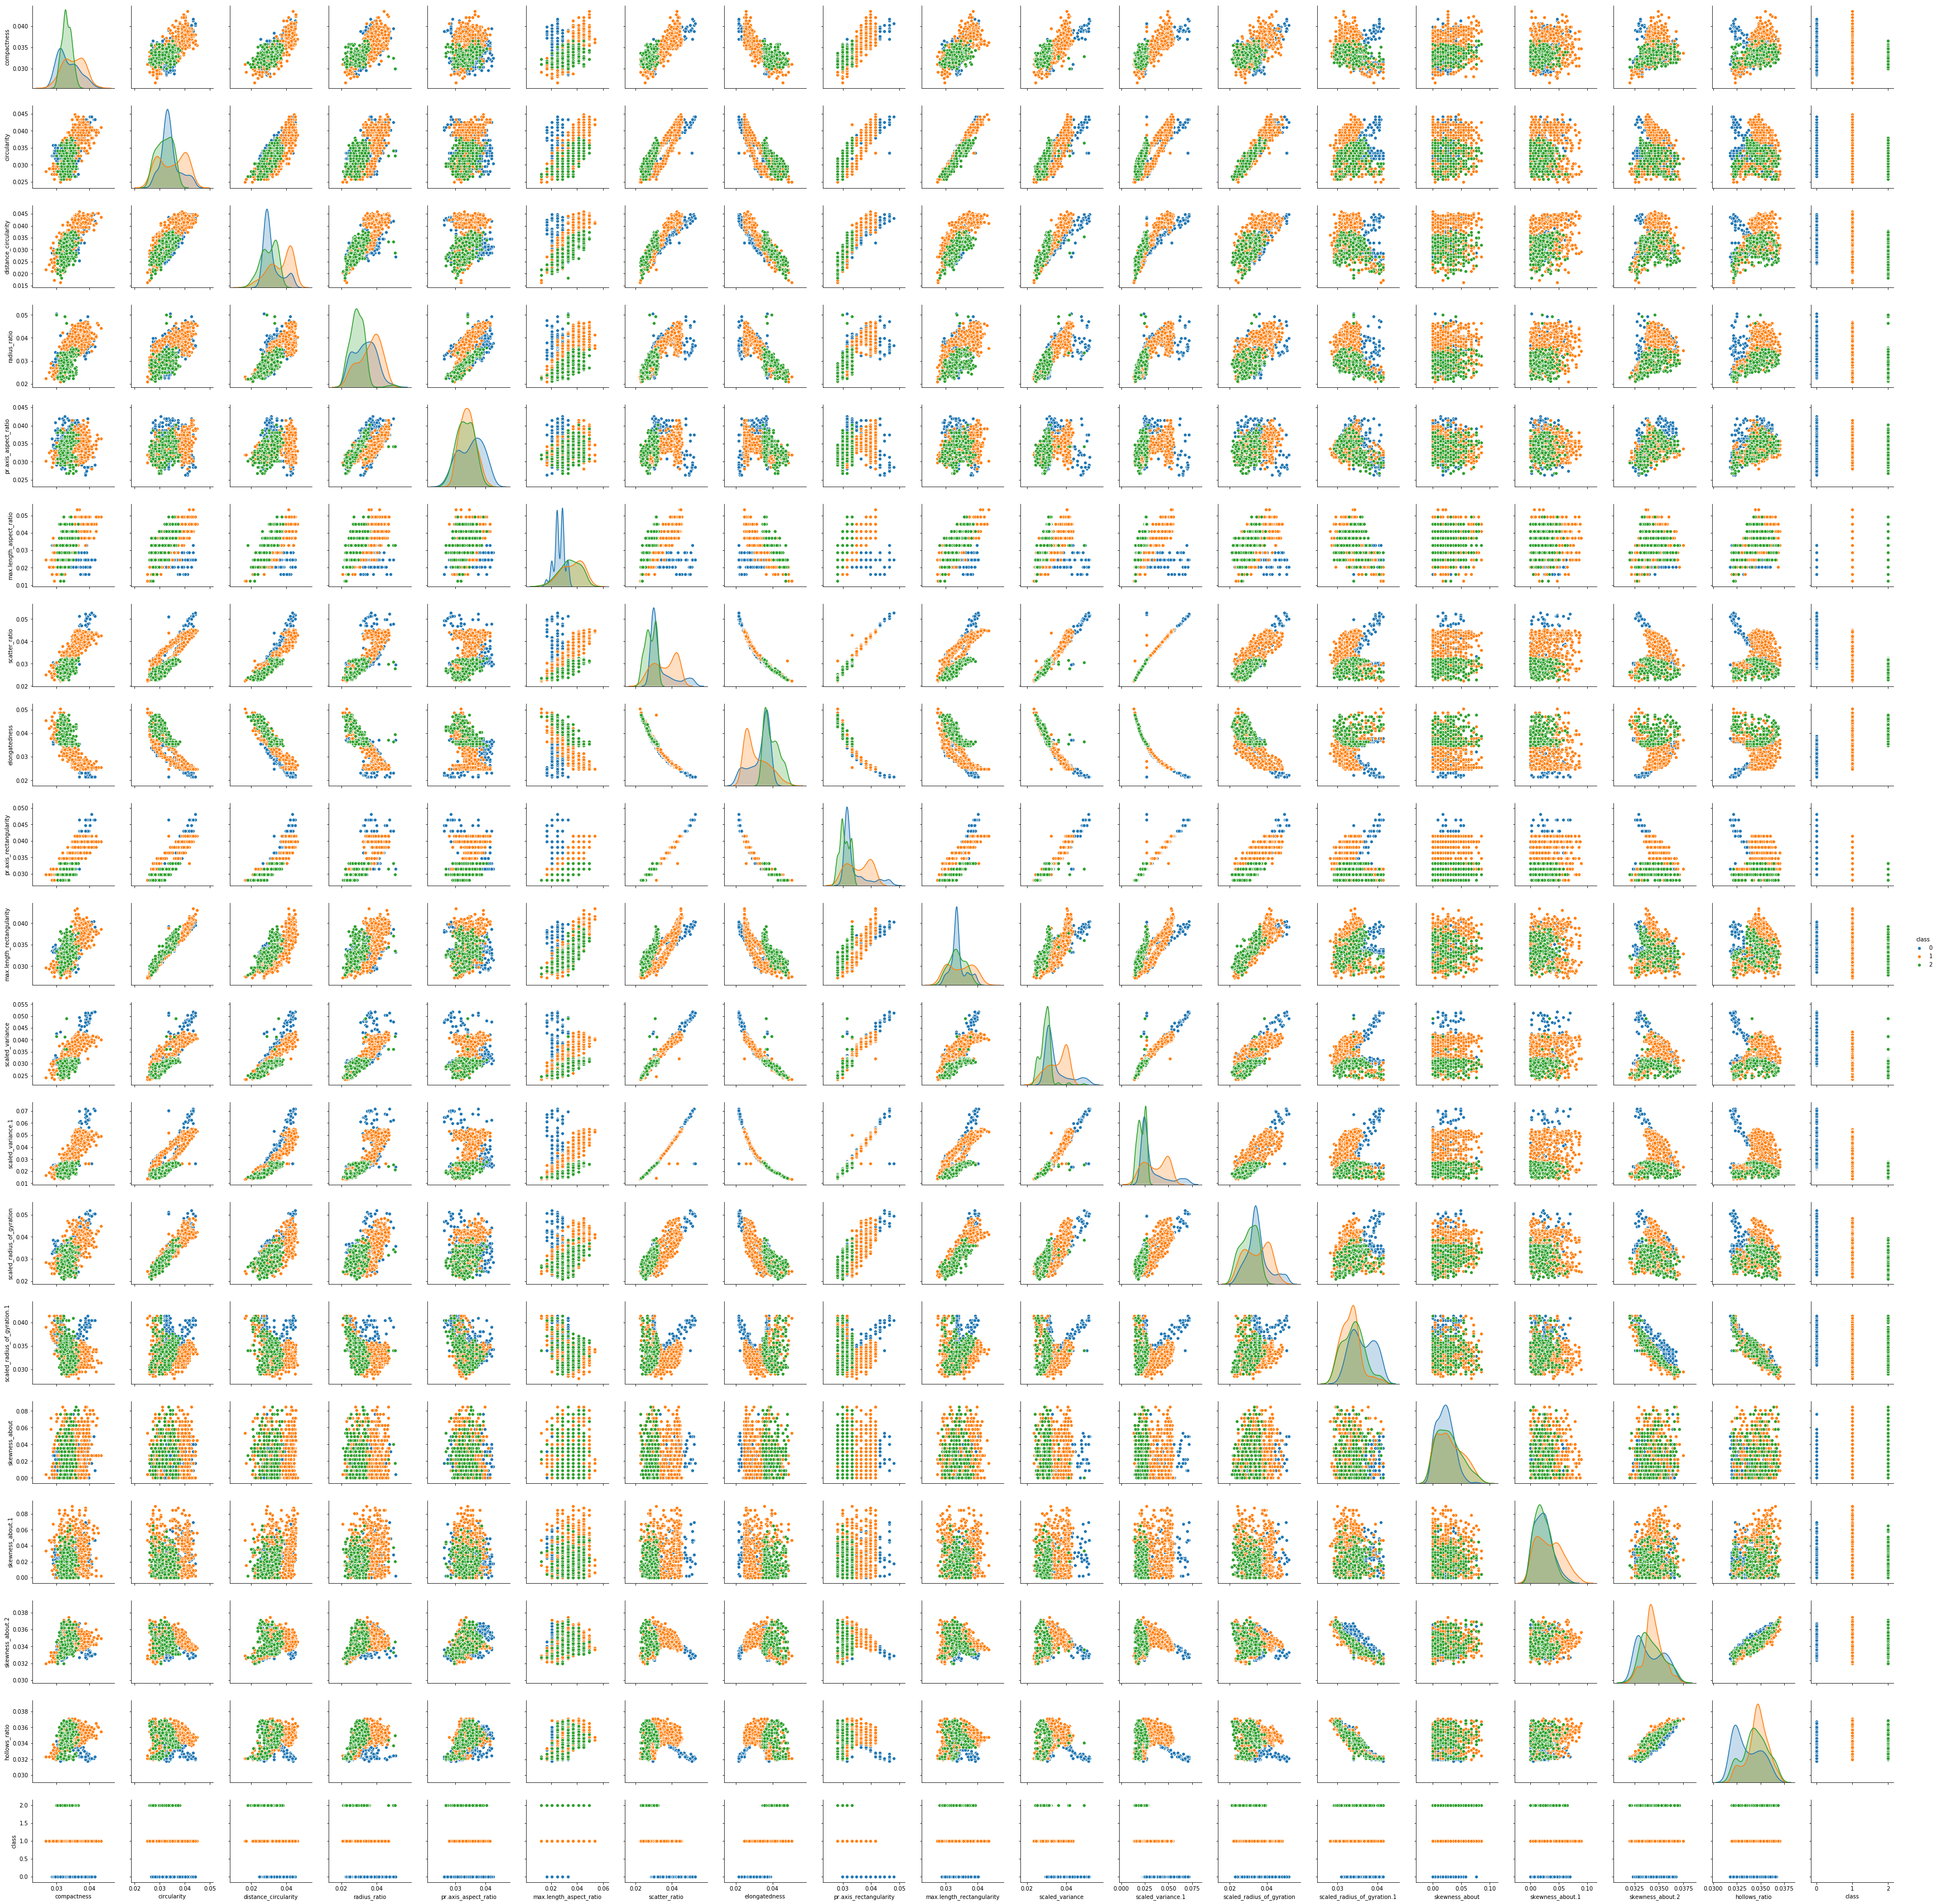

In [22]:
plt.figure(figsize = (20,20))
sns.pairplot(vehicle_df_norm,diag_kind = 'kde',hue = 'class')

- The pair plot with density plots in the diagonal shows that there are density plots with almost no tails, as we have removed outliers
- The pair panel reveals that there are many plots which shows good linear relationship which is essential for the PCA to be implemented successfully

In [23]:
corr = vehicle_df_norm.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

- The PCA analysis will be helpfull modelling as many of the correlations are more than 0.5 

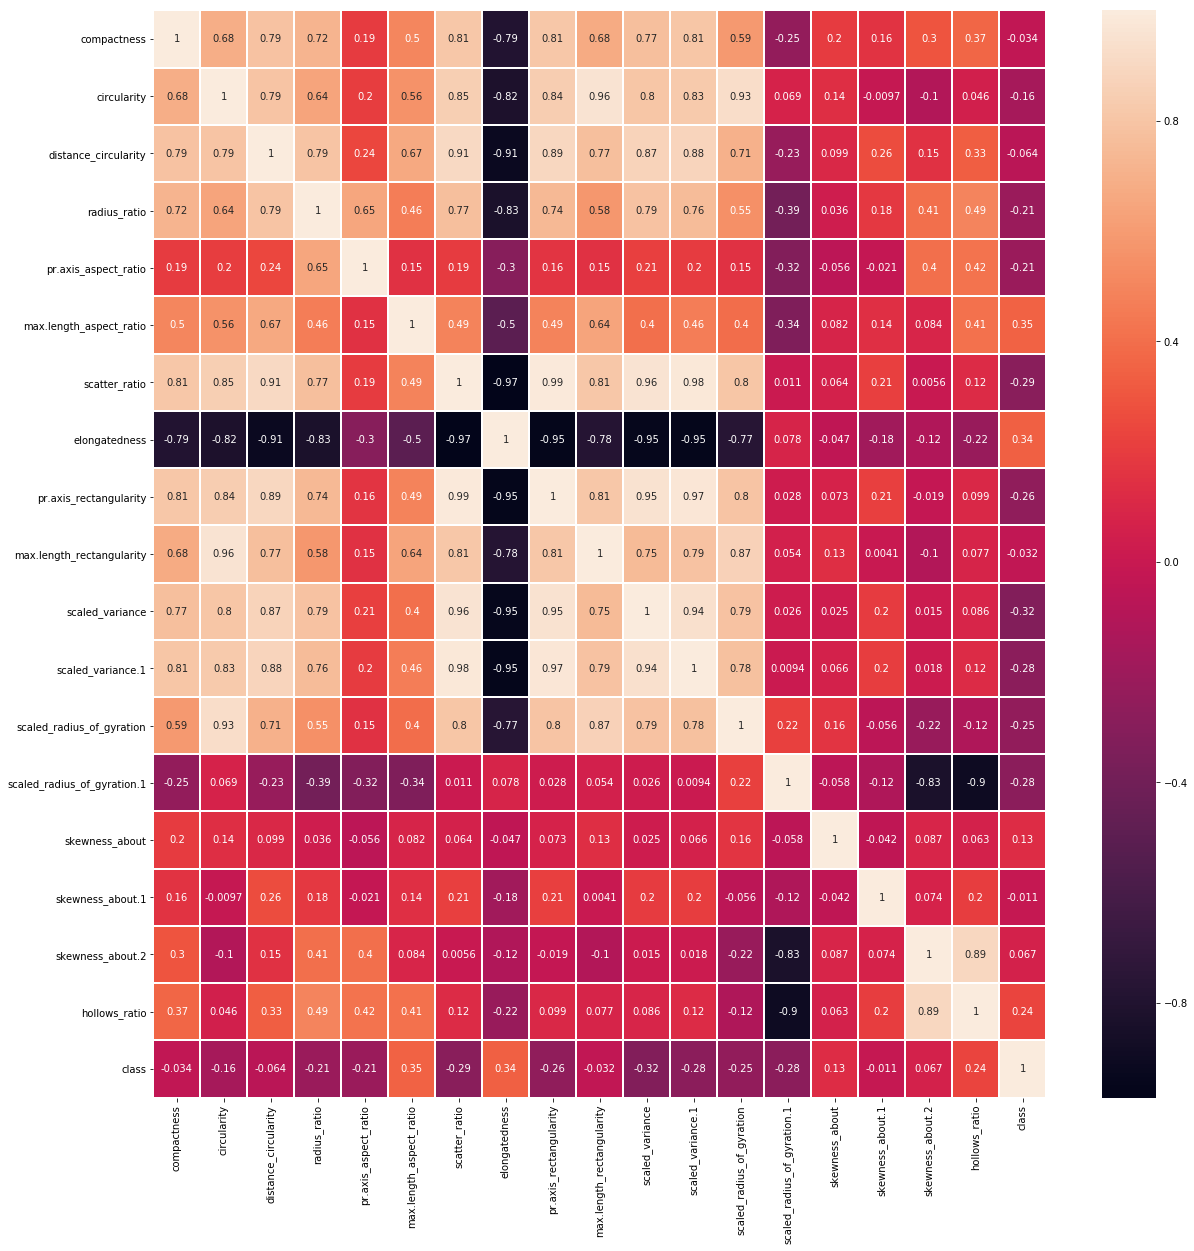

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,linewidth = 1)

- There are many such cells in the heatmap which have correlation greater than 0.5.  PCA will be of good help in reducing the dimensions

In [25]:
print(vehicle_df_norm['class'].value_counts())

1    429
0    218
2    199
Name: class, dtype: int64


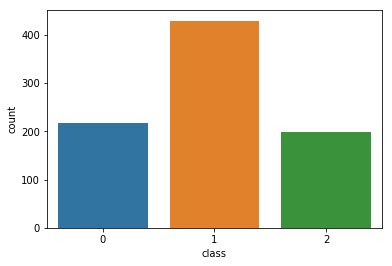

In [26]:
sns.countplot(x = 'class', data = vehicle_df_norm)

- Boxplot of the Target variable 'Class' against the other attributes

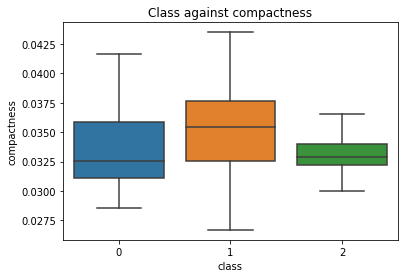

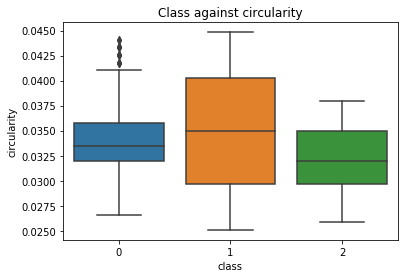

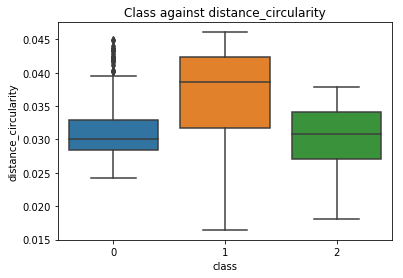

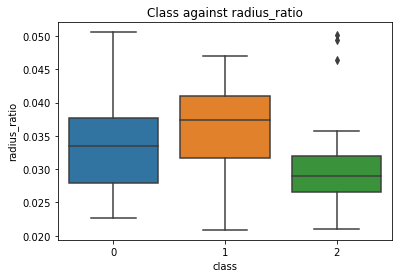

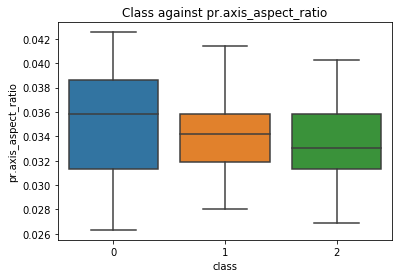

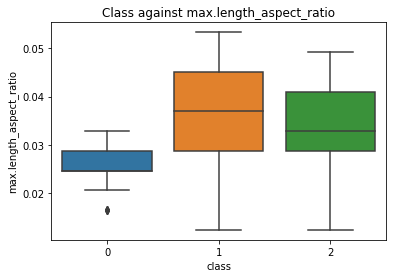

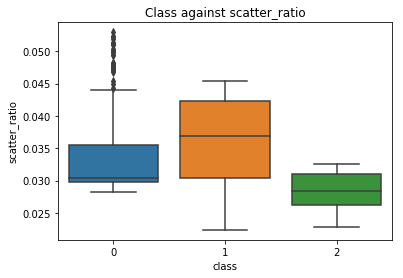

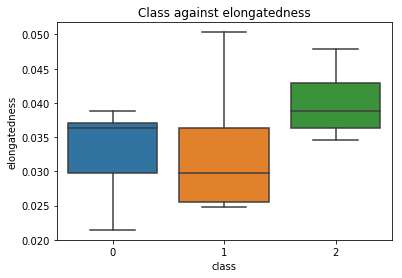

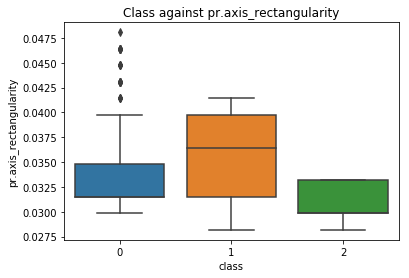

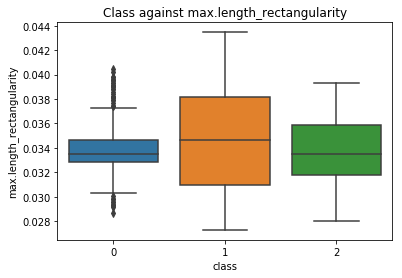

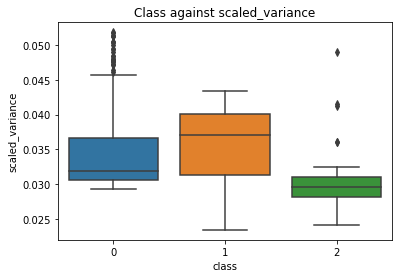

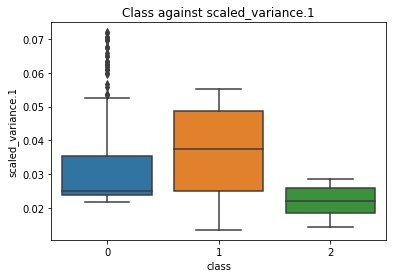

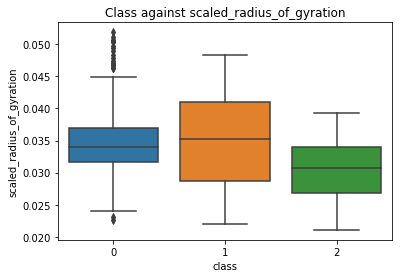

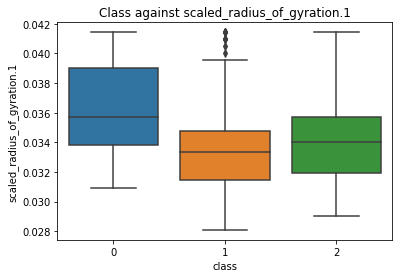

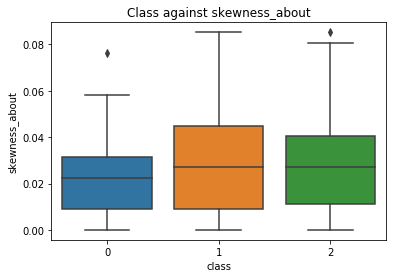

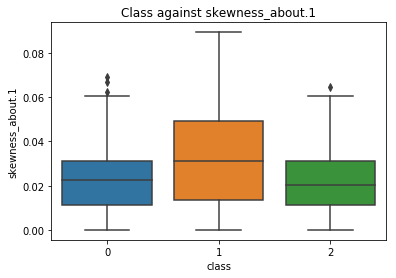

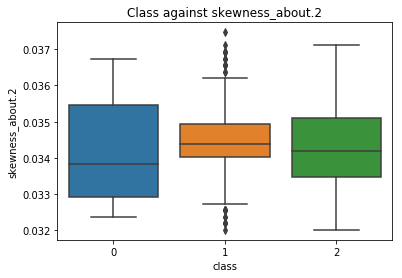

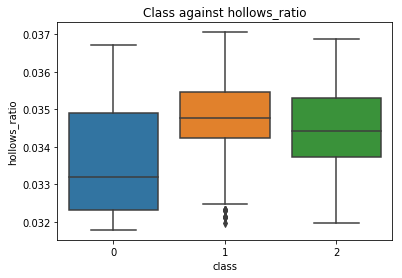

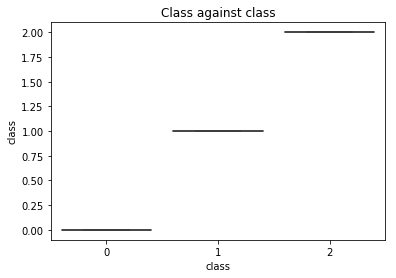

In [27]:
col = vehicle_df_norm[:17]
for item in col:
    
    plt.title('Class' + ' against ' + str(item))
    sns.boxplot(x = vehicle_df_norm['class'], y = vehicle_df_norm[item], data = vehicle_df_norm) 
    plt.show()

# Splitting the data set

In [83]:
#To split the data into train and test data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

#To check the accuracy of the model
from sklearn.metrics import accuracy_score

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# for prepartation of classification report
from sklearn.metrics import classification_report,make_scorer

# for drawing roc and aoc curves
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,auc

# for ensemble techniques
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [84]:
X = vehicle_df_norm.iloc[:,:18]
y = vehicle_df_norm.iloc[:,18]

In [85]:
X.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.034732     0.036477              0.034136      0.035711   
1     0.033270     0.031158              0.034548      0.028288   
2     0.038022     0.037997              0.043596      0.041930   
3     0.034001     0.031158              0.033725      0.031899   
4     0.031076     0.033437              0.028790      0.041128   
5     0.039119     0.033437              0.043596      0.034507   
6     0.035463     0.032678              0.030024      0.034708   
7     0.032904     0.032678              0.027145      0.031498   
8     0.031442     0.025838              0.025499      0.028087   
9     0.034001     0.033437              0.040306      0.033504   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.040309                 0.041046       0.032360   
1              0.031911                 0.036941       0.029763   
2              0.036949                 0.041046       0.041349   
3              0.035270                 0.036941       0.028764   
4              0.034150                 0.032837       0.029763   
5              0.027992                 0.024627       0.050937   
6              0.036390                 0.024627       0.030562   
7              0.036390                 0.036941       0.027366   
8              0.034150                 0.028732       0.024370   
9              0.034710                 0.045150       0.036555   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.034650                0.033150                   0.036760   
1       0.037125                0.031493                   0.033061   
2       0.026400                0.038123                   0.036529   
3       0.037950                0.031493                   0.033061   
4       0.037125                0.031493                   0.033292   
5       0.021450                0.046410                   0.039072   
6       0.034650                0.031493                   0.033061   
7       0.039600                0.029835                   0.033755   
8       0.044550                0.028178                   0.029362   
9       0.029700                0.036465                   0.033755   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.031686           0.027654                   0.035598   
1         0.030606           0.024079                   0.030568   
2         0.040148           0.046333                   0.042563   
3         0.028806           0.022546                   0.024570   
4         0.043389           0.023714                   0.036372   
5         0.050410           0.069828                   0.051075   
6         0.031686           0.026341                   0.033276   
7         0.029166           0.020503                   0.031728   
8         0.025385           0.016271                   0.021668   
9         0.036367           0.036848                   0.029407   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.033330        0.026929          0.035763   
1                     0.034282        0.040393          0.031292   
2                     0.034758        0.062833          0.020117   
3                     0.029997        0.026929          0.022352   
4                     0.034044        0.040393          0.024587   
5                     0.040472        0.022440          0.020117   
6                     0.031425        0.058345          0.002235   
7                     0.031902        0.013464          0.006706   
8                     0.030473        0.008976          0.031292   
9                     0.030473        0.017952          0.031292   

   skewness_about.2  hollows_ratio  
0          0.034014       0.034596  
1          0.034377       0.034947  
2          0.034195       0.034420  
3          0.036196       0.036352  
4          0.032740       0.032137  
5          0.032922      

In [86]:
y.head(10)

0    2
1    2
2    1
3    2
4    0
5    0
6    0
7    2
8    2
9    1
Name: class, dtype: int8

In [87]:
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

- Standardizing the feature variables using StandardScaler

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [89]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

# PCA ANALYSIS

- Creating Covariance Matrix

In [90]:
# Obtaining the co-variance matrix
cov_matrix = np.cov(X_std.T)

In [91]:
print('The Covariance matrix is \n%s', cov_matrix)

The Covariance matrix is 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.1

In [92]:
# Step 2 : Calculating eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

In [93]:
print('Eigen values are \n%s', eigenvalues)

Eigen values are 
%s [9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]


In [94]:
print('Eigen Vectors are \n%s', eigenvectors)

Eigen Vectors are 
%s [[-2.72502890e-01 -8.70435783e-02 -3.81852075e-02 -1.38675013e-01
   1.37101466e-01 -2.63611383e-01 -2.02717114e-01  7.58796410e-01
  -3.66685918e-01 -1.60045219e-01 -8.40252779e-02 -2.14645175e-02
   1.87350749e-02 -6.89082276e-02 -4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01 -2.01146908e-01  3.80554832e-02
  -1.38995553e-01  7.13474241e-02  3.92275358e-01  6.76034223e-02
  -5.53261885e-02  1.82323962e-01  3.65229874e-02 -1.47247511e-01
   4.89102355e-02 -5.90534770e-02  6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02  6.34621085e-02 -1.08954287e-01
  -8.00174278e-02  1.69006151e-02 -1.63371282e-01 -2.77371950e-01
  -7.46784853e-02 -2.73033778e-01 -4.68505530e-01 -6.52730855e-01
  -4.74162132e-03  1.62108150e-01  4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01  5.62851689e-02  2.54355087e-01
   1.33744367e-

In [95]:
# Step 3 : Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.749402689379597, array([-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
       -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
       -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
       -0.05872048, -0.03801314, -0.08474   ])), (3.350719119412979, array([-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
       -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
        0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
       -0.09274624, -0.50162122, -0.50761211])), (1.1923815452731583, array([-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
       -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
        0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
        0.6706805 , -0.06224071, -0.04170535])), (1.1338191632147816, array([-0.13867501,  0.03805548, -0.10895429,  0.25435509,  0.61276572,
       -0.27867816, -0.00539295, -0.06521486, -0.0

In [96]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%
cum_var_exp


array([0.54099325, 0.72692428, 0.7930894 , 0.85600489, 0.90505781,
       0.94202882, 0.95968297, 0.97234461, 0.97961482, 0.98404634,
       0.98811919, 0.99170474, 0.99393237, 0.99572335, 0.9973544 ,
       0.99861405, 0.99971351, 1.        ])

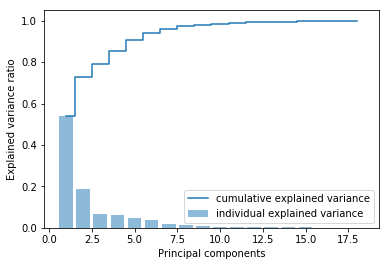

In [97]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

- First 10 principal components explain 98% of the variance and after that the covariance curve is almost a straight line.  Hence, let us consider only the first 10 principal components

# Reducing the number of principal components for modelling 

In [98]:
P_reduced = np.array(eigvectors_sorted[0:10])

In [99]:
P_reduced

array([[-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
        -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
        -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
        -0.05872048, -0.03801314, -0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [-0.13867501,  0.03805548, -0.10895429,  0.25435509,  0.61276572,
        -0.27867816, -0.00539295, -0.06521486, -0.03089915, -0.04146747,
         0.06400509,  0.00219687,  0.08553965,  0.115

In [100]:
X_std_10D = np.dot(X_std,P_reduced.T)
X_std_10D

array([[-0.58422804, -0.67567325, -0.45333356, ...,  0.68196902,
        -0.31266966,  0.14411602],
       [ 1.5121798 , -0.34893367, -0.33343619, ..., -0.10442512,
         0.29625823, -0.39097765],
       [-3.91344816,  0.2345073 , -1.26509352, ..., -0.17305277,
        -0.19108534, -0.52948668],
       ...,
       [-5.12009307, -0.18227007, -0.50836783, ...,  0.38820845,
         0.07735512,  0.55527162],
       [ 3.29709502, -1.10194286,  1.93384417, ..., -0.45880709,
        -0.82142229, -0.34059305],
       [ 4.96759448,  0.42274968,  1.30871531, ...,  0.21433678,
        -0.59676772,  0.10856429]])

In [169]:
#The feature matrix with pricipal components
PCA_X = pd.DataFrame(X_std_10D)
PCA_X.head(10)

0         1         2         3         4         5         6  \
0 -0.584228 -0.675673 -0.453334  0.750656 -0.777515  1.848809  0.180415   
1  1.512180 -0.348934 -0.333436 -1.268953 -0.324929  0.118317 -0.203308   
2 -3.913448  0.234507 -1.265094 -0.137224  0.915751  0.685594 -0.811588   
3  1.535193 -3.044413 -0.469623 -0.324317 -0.611590 -0.367777 -0.118281   
4  0.642062  1.488882 -0.246288  0.550939  0.471655  1.012698 -0.468846   
5 -5.382325  4.658285  1.173396 -0.242066  1.587378 -2.508101 -0.365674   
6  0.813699 -2.220045 -1.962160  0.410052  1.522932 -0.655823  0.402332   
7  1.957907 -1.555542 -1.007429  0.902755 -1.212775 -0.065279  0.328964   
8  4.380109 -3.289965  0.571911 -0.051623 -0.441567 -0.669753  0.350658   
9 -1.223449 -1.977784  0.480900 -0.491087 -1.040337 -0.381087 -0.683488   

          7         8         9  
0  0.681969 -0.312670  0.144116  
1 -0.104425  0.296258 -0.390978  
2 -0.173053 -0.191085 -0.529487  
3  0.195857  0.389317  0.249992  
4 -1.272885 -1.487357 -0.003706  
5 -0.440776  0.252874 -0.568750  
6  0.147048  0.140147 -0.132688  
7  0.338090 -0.015350 -0.041446  
8  0.221340  0.429290  0.083639  
9 -0.691869  0.598128  0.081337

In [102]:
PCA_X.corr()

0             1             2             3             4  \
0  1.000000e+00 -6.776774e-17  9.063464e-17  1.487450e-16  1.980845e-16   
1 -6.776774e-17  1.000000e+00  2.348605e-16  3.192114e-16  8.543536e-17   
2  9.063464e-17  2.348605e-16  1.000000e+00  4.323901e-16  3.668364e-16   
3  1.487450e-16  3.192114e-16  4.323901e-16  1.000000e+00 -1.692301e-16   
4  1.980845e-16  8.543536e-17  3.668364e-16 -1.692301e-16  1.000000e+00   
5 -8.062645e-17 -3.187636e-17 -6.121870e-16 -1.136230e-15 -1.029063e-15   
6  4.289590e-16  5.023311e-17  3.016329e-16  1.186765e-16  6.955546e-16   
7  4.755097e-16  4.993552e-16 -6.896701e-16  5.216923e-16  7.824618e-16   
8  5.998570e-17  1.418821e-15 -5.454915e-16 -2.280559e-16 -1.169249e-15   
9  7.884254e-16 -1.902535e-16 -4.635581e-16  3.736446e-16 -5.867288e-16   

              5             6             7             8             9  
0 -8.062645e-17  4.289590e-16  4.755097e-16  5.998570e-17  7.884254e-16  
1 -3.187636e-17  5.023311e-17  4.993552e-16  1.418821e-15 -1.902535e-16  
2 -6.121870e-16  3.016329e-16 -6.896701e-16 -5.454915e-16 -4.635581e-16  
3 -1.136230e-15  1.186765e-16  5.216923e-16 -2.280559e-16  3.736446e-16  
4 -1.029063e-15  6.955546e-16  7.824618e-16 -1.169249e-15 -5.867288e-16  
5  1.000000e+00 -9.722665e-16  3.434571e-16  8.979526e-16  5.122365e-16  
6 -9.722665e-16  1.000000e+00 -2.327321e-15 -8.480149e-16 -3.859108e-16  
7  3.434571e-16 -2.327321e-15  1.000000e+00 -4.616314e-16  1.621940e-15  
8  8.979526e-16 -8.480149e-16 -4.616314e-16  1.000000e+00 -1.626274e-15  
9  5.122365e-16 -3.859108e-16  1.621940e-15 -1.626274e-15  1.000000e+00

# Splitting the dataset into training and test data using PCA vectors

In [103]:
seed = 1000
X_train, X_test, y_train, y_test = train_test_split(PCA_X,y,test_size = 0.3,random_state = seed)

# Training and Kfold validation of classical algorithms

In [105]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize

from scipy import interp

from itertools import cycle



In [106]:
# Defining Confusion Matrix
def confusion(x,y):
    cm = confusion_matrix(x,y)
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix", fontsize=20)
    plt.subplots_adjust(left=0.1, right=0.5, bottom=0.11, top=0.5)
    ax.set_yticks(np.arange(cm.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels("")
    #ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=10, rotation=360)
    plt.show()

In [107]:
# Initiating Models
clfLR = LogisticRegression(random_state = seed, class_weight = None)
clfNB = GaussianNB()
clfKNN = KNeighborsClassifier()
clfDT = DecisionTreeClassifier(random_state = seed, class_weight = None)
clfSVC = SVC(random_state = seed, class_weight = None)
clfRF = RandomForestClassifier(n_estimators = 18)
clfGB = GradientBoostingClassifier()

In [108]:
# Creating the matrix of models 
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

Automatically created module for IPython interactive environment


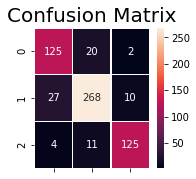

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       147
           1       0.90      0.88      0.89       305
           2       0.91      0.89      0.90       140

   micro avg       0.88      0.88      0.88       592
   macro avg       0.87      0.87      0.87       592
weighted avg       0.88      0.88      0.88       592

Logistic Regression:Mean of cross validation accuracy 0.874932


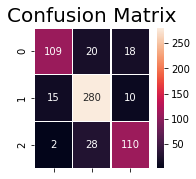

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       147
           1       0.85      0.92      0.88       305
           2       0.80      0.79      0.79       140

   micro avg       0.84      0.84      0.84       592
   macro avg       0.84      0.82      0.82       592
weighted avg       0.84      0.84      0.84       592

Naive Bayes:Mean of cross validation accuracy 0.842829


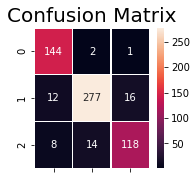

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       147
           1       0.95      0.91      0.93       305
           2       0.87      0.84      0.86       140

   micro avg       0.91      0.91      0.91       592
   macro avg       0.90      0.91      0.90       592
weighted avg       0.91      0.91      0.91       592

K-Nearest Neighbour:Mean of cross validation accuracy 0.910497


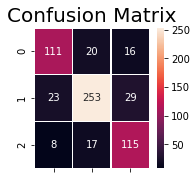

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.87      0.83      0.85       305
           2       0.72      0.82      0.77       140

   micro avg       0.81      0.81      0.81       592
   macro avg       0.79      0.80      0.80       592
weighted avg       0.81      0.81      0.81       592

Decision Tree:Mean of cross validation accuracy 0.808987


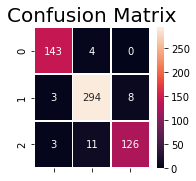

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       147
           1       0.95      0.96      0.96       305
           2       0.94      0.90      0.92       140

   micro avg       0.95      0.95      0.95       592
   macro avg       0.95      0.95      0.95       592
weighted avg       0.95      0.95      0.95       592

Support Vector Classifier:Mean of cross validation accuracy 0.951004


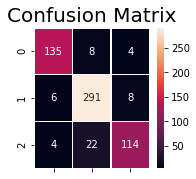

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       147
           1       0.91      0.95      0.93       305
           2       0.90      0.81      0.86       140

   micro avg       0.91      0.91      0.91       592
   macro avg       0.91      0.90      0.90       592
weighted avg       0.91      0.91      0.91       592

Random Forest:Mean of cross validation accuracy 0.891910


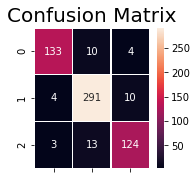

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       147
           1       0.93      0.95      0.94       305
           2       0.90      0.89      0.89       140

   micro avg       0.93      0.93      0.93       592
   macro avg       0.93      0.91      0.92       592
weighted avg       0.93      0.93      0.93       592

Gradeint Boosting:Mean of cross validation accuracy 0.923957


In [112]:

#Training and Cross validation of different models with confusion matrix, classification report and AUC of ROC-AUC curve
results = []
names = []
mean_score = []
fpr = dict()
#initialising the kfold value for Logistic Regression
for name,model in Models:
        
    kfold = KFold(n_splits=5, shuffle=True, random_state = seed)
    cv_results = cross_val_score(model,X_train, y_train,cv = kfold,   scoring = 'accuracy')
    cv_predict_train = cross_val_predict(model,X_train,y_train,cv = kfold)
    confusion(y_train,cv_predict_train)
    cr = classification_report(y_train, cv_predict_train)
    print(cr)
    results.append(cv_results)
    names.append(name)
    mean_score.append(cv_results.mean())
    msg = "%s:Mean of cross validation accuracy %f" % (name,cv_results.mean())
    print(msg)
    
    
   
   

In [113]:
#Defining dataframe of classifiers with respective cross validation score mean and AUC of ROC-AUC curve
dtrain = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Cross Val Mean Score' : np.array(mean_score),
                    # 'Area Under ROC Curve' : np.array(AUC)
         }
Classifier_train = pd.DataFrame(data = dtrain)
Classifier_train


Classifiers  Cross Val Mean Score
0         Logistic Regession              0.874932
1                Naive Bayes              0.842829
2         K Nearest Neighbor              0.910497
3              Decision Tree              0.808987
4  Support Vector Classifier              0.951004
5              Random Forest              0.891910
6          Gradient Boosting              0.923957

In [114]:
Models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('K-Nearest Neighbour',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best')),
 ('Support Vector Classifier',
  SVC(C=1.0, cache_size

In [115]:
# Displaying models in the ascending order of their mean scores in cross validation
Classifier_train = Classifier_train.sort_values(by=['Cross Val Mean Score'], ascending=False)
Classifier_train

Classifiers  Cross Val Mean Score
4  Support Vector Classifier              0.951004
6          Gradient Boosting              0.923957
2         K Nearest Neighbor              0.910497
5              Random Forest              0.891910
0         Logistic Regession              0.874932
1                Naive Bayes              0.842829
3              Decision Tree              0.808987

- The support vector classifier has the highest mean accuracy, followed by Gradient Boosting, KNN

# Testing the Algorithms

In [116]:
# Testing the models
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

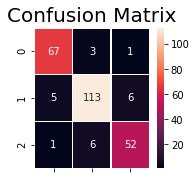

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.93      0.91      0.92       124
           2       0.88      0.88      0.88        59

   micro avg       0.91      0.91      0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254

Logistic Regression : Test Score is 0.91
****************************************************************************************************


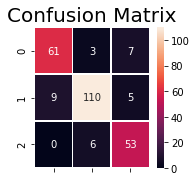

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        71
           1       0.92      0.89      0.91       124
           2       0.82      0.90      0.85        59

   micro avg       0.88      0.88      0.88       254
   macro avg       0.87      0.88      0.88       254
weighted avg       0.88      0.88      0.88       254

Naive Bayes : Test Score is 0.88
****************************************************************************************************


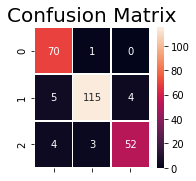

              precision    recall  f1-score   support

           0       0.89      0.99      0.93        71
           1       0.97      0.93      0.95       124
           2       0.93      0.88      0.90        59

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0.93      0.93       254

K-Nearest Neighbour : Test Score is 0.93
****************************************************************************************************


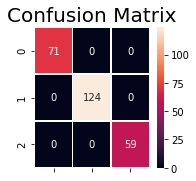

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        59

   micro avg       1.00      1.00      1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

Decision Tree : Test Score is 1.00
****************************************************************************************************


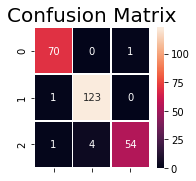

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.97      0.99      0.98       124
           2       0.98      0.92      0.95        59

   micro avg       0.97      0.97      0.97       254
   macro avg       0.97      0.96      0.97       254
weighted avg       0.97      0.97      0.97       254

Support Vector Classifier : Test Score is 0.97
****************************************************************************************************


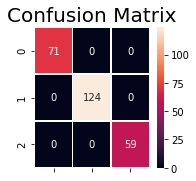

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        59

   micro avg       1.00      1.00      1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

Random Forest : Test Score is 1.00
****************************************************************************************************


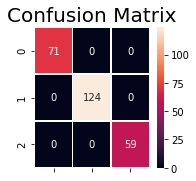

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00        59

   micro avg       1.00      1.00      1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254

Gradeint Boosting : Test Score is 1.00
****************************************************************************************************


In [117]:
#Fitting the models trained, testing, their confusion matrix, classification report
names = []
score_test = []
for name,model in Models :
    model.fit(X_test,y_test)
    y_predict_test = model.predict(X_test)
    confusion(y_test,y_predict_test)
    test_score = model.score(X_test,y_test)
    score_test.append(test_score)
    cr = classification_report(y_test,y_predict_test)
    print(cr)
    msg = "%s : Test Score is %.2f" %(name,test_score)
    print(msg)
    print('*' *100)


In [118]:
#Defining data frame of Models and their test scores
dtest = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Test Score' : np.array(score_test)
         }

Classifier_test = pd.DataFrame(data = dtest)


In [119]:
#Defining dataset for test score and displaying in the order of test score
Classifier_test = Classifier_test.sort_values(by=['Test Score'], ascending=False)
Classifier_test

Classifiers  Test Score
3              Decision Tree    1.000000
5              Random Forest    1.000000
6          Gradient Boosting    1.000000
4  Support Vector Classifier    0.972441
2         K Nearest Neighbor    0.933071
0         Logistic Regession    0.913386
1                Naive Bayes    0.881890

- Decision Tree, Random Forest and Gradient Boosting are overfitting in the training set.  

# GRID SEARCH

In [120]:
#import gridsearch from sklearn
from sklearn.model_selection import GridSearchCV

LOGISTIC REGRESSION

In [121]:
#Initial Logistic Tree Classifier
clfLR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- Initial hyper parameter value used in grid search in default value of C i.e., 1.0

In [122]:
param_grid =  { 
               'C' : [0.01,0.1,1,10,100]
             }

In [123]:
grid_search_LR = GridSearchCV(estimator = clfLR, param_grid = param_grid, scoring = None, cv = 3, n_jobs = -1, verbose = 3)

In [124]:
grid_search_LR.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [125]:
grid_search_LR.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
grid_search_LR.best_score_

0.875

In [127]:
y_predict_gs_LR = grid_search_LR.predict(X_test)

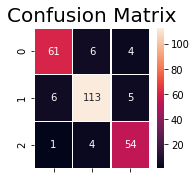

In [128]:
confusion(y_test,y_predict_gs_LR)

In [129]:
print(classification_report(y_test,y_predict_gs_LR))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        71
           1       0.92      0.91      0.91       124
           2       0.86      0.92      0.89        59

   micro avg       0.90      0.90      0.90       254
   macro avg       0.89      0.90      0.89       254
weighted avg       0.90      0.90      0.90       254



DECISION TREE CLASSIFIER

In [130]:
# Initial Decision Tree Classifier
clfDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [131]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,4,10,20],
    'min_samples_leaf': [1,5,10,20],
    'max_depth': [2,5,10,20]
    
}

In [132]:
grid_search = GridSearchCV(estimator = clfDT, param_grid = param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1, verbose = 3)

In [133]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 10, 20], 'min_samples_leaf': [1, 5, 10, 20], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [134]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

In [135]:
grid_search.best_score_

0.8361486486486487

In [136]:
y_predict_gs = grid_search.predict(X_test)

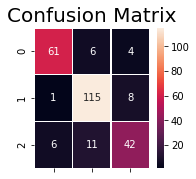

In [137]:
confusion(y_test,y_predict_gs)

- The overfitting of decision tree is being corrected after grid search,  and the accuracy comes down to 83%

RANDOM FOREST

In [138]:
# Initial Random forest classifier
clfRF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10,], 
              "n_estimators": [50, 100, 400]
             }

In [140]:
gs_rf = GridSearchCV(estimator=clfRF, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose = 1)

In [141]:
gs_rf=gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   27.1s finished


In [142]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
gs_rf.best_score_

0.9121621621621622

In [144]:
y_predict_gs_rf = gs_rf.predict(X_test)

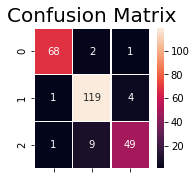

In [145]:
confusion(y_test,y_predict_gs_rf)

In [146]:
print(classification_report(y_test,y_predict_gs_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.92      0.96      0.94       124
           2       0.91      0.83      0.87        59

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



- The overfitting of the random forest algorithm is addressed and the accuracy comes down to 91% after grid search

SUPPORT VECTOR CLASSIFIER

In [147]:
#INITIAL SVC CLASSIFIER
clfSVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1000,
  shrinking=True, tol=0.001, verbose=False)

In [148]:
param_grid = {'C': [0.1,1, 10, 100], 
     'gamma': [1,0.1,0.01,0.001], 
     'kernel': ['rbf','sigmoid']}

In [149]:
gs_svc = GridSearchCV(estimator=clfSVC, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1,verbose=3)

In [150]:
gs_svc.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  96 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1000,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [151]:
gs_svc.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1000, shrinking=True,
  tol=0.001, verbose=False)

In [152]:
gs_svc.best_score_

0.9408783783783784

In [153]:
y_predict_gs_svc = gs_svc.predict(X_test)

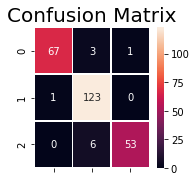

In [154]:
confusion(y_test,y_predict_gs_svc)

In [155]:
print(classification_report(y_test,y_predict_gs_svc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.93      0.99      0.96       124
           2       0.98      0.90      0.94        59

   micro avg       0.96      0.96      0.96       254
   macro avg       0.97      0.94      0.95       254
weighted avg       0.96      0.96      0.96       254



- Error due to variance is reduced after grid search and accuracy comes down to 94% from 97%

# BAGGING CLASSIFIER

In [156]:
from sklearn.ensemble import BaggingClassifier

In [157]:
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('K-Nearest Neighbour',clfKNN))
Models.append(('Decision Tree', clfDT))
Models.append(('Support Vector Classifier', clfSVC))
Models.append(('Random Forest',clfRF))
Models.append(('Gradeint Boosting', clfGB))

In [158]:
name = []
Bagging_score = []
for name,model in Models:
    model_bagging = BaggingClassifier(base_estimator = model,n_estimators=50,max_samples=.7 , oob_score=True,random_state = seed,n_jobs = -1)
    y_predict_bagging = model_bagging.fit(X_train,y_train)
    score_bagging = model_bagging.oob_score_
    Bagging_score.append(score_bagging)
    print('Bagging score of model %s is %.3f' %(name,score_bagging))
    

Bagging score of model Logistic Regression is 0.868
Bagging score of model Naive Bayes is 0.836
Bagging score of model K-Nearest Neighbour is 0.921
Bagging score of model Decision Tree is 0.902
Bagging score of model Support Vector Classifier is 0.944
Bagging score of model Random Forest is 0.922
Bagging score of model Gradeint Boosting is 0.922


In [159]:
Bagging_score

[0.8682432432432432,
 0.8361486486486487,
 0.9206081081081081,
 0.902027027027027,
 0.9442567567567568,
 0.9222972972972973,
 0.9222972972972973]

In [160]:
d_test_bagging = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'K Nearest Neighbor', 'Decision Tree', 'Support Vector Classifier',
                    'Random Forest', 'Gradient Boosting'],
                     'Test Score' : np.array(score_test),
                     'Bagging Score' : np.array(Bagging_score)
         }

Classifier_test_bagging = pd.DataFrame(data = d_test_bagging)

In [161]:
Classifier_test_bagging

Classifiers  Test Score  Bagging Score
0         Logistic Regession    0.913386       0.868243
1                Naive Bayes    0.881890       0.836149
2         K Nearest Neighbor    0.933071       0.920608
3              Decision Tree    1.000000       0.902027
4  Support Vector Classifier    0.972441       0.944257
5              Random Forest    1.000000       0.922297
6          Gradient Boosting    1.000000       0.922297

In [162]:
Models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('K-Nearest Neighbour',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best')),
 ('Support Vector Classifier',
  SVC(C=1.0, cache_size

- The bagging classifier improves the performance of almost all the algorithms, reducing the error due to variance of all the models

# ADAPTIVE BOOSING

In [163]:
from sklearn.ensemble import AdaBoostClassifier

In [164]:
Models = []
Models.append(('Logistic Regression', clfLR))
Models.append(('Naive Bayes', clfNB))
Models.append(('Decision Tree', clfDT))


In [165]:
name = []
Boosting_score = []
for name,model in Models:
    model_boosting = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state = seed,algorithm = 'SAMME.R')
    model_boosting.fit(X_train,y_train)
    score_boosting = model_bagging.oob_score_
    Boosting_score.append(score_boosting)
    print('Boosting score of model %s is %.3f' %(name,score_boosting))
    

Boosting score of model Logistic Regression is 0.922
Boosting score of model Naive Bayes is 0.922
Boosting score of model Decision Tree is 0.922


In [166]:
d_test_boosting = {'Classifiers': ['Logistic Regession', 'Naive Bayes', 'Decision Tree'],
                                           'Boosting Score' : np.array(Boosting_score)
         }

Classifier_test_boosting = pd.DataFrame(data = d_test_boosting)

In [167]:
Classifier_test_boosting

Classifiers  Boosting Score
0  Logistic Regession        0.922297
1         Naive Bayes        0.922297
2       Decision Tree        0.922297

In [168]:
Models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=1000, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
              splitter='best'))]

- The adaptive boosting improves the accuracy of logistic regression, Naive Bayes and Decision tree 

# Conclusions

- The missing values and the outliers in the dataset are imputed with the central values (median values) as it will not change the distribution of attributes predominantly.


- The principal component analysis (PCA) is done and 10 of the 18 principal components are taken which explains about 98.4% of the variance in the dataset.


- Logistic Regression, KNearest Neighbours, Naive Bayes, Decision tree, Random Forest, Support Vector Classfier and  Gradient descent models are checked in modelling with 5 fold cross validation in training phase. Clarification report and confusin matrix of each model is obtained with the Principal components selected.
  
    
- Support vector classifier, K Nearest neigbor, Logistic regression and naive Baye's does well in both training and testing phase in terms of accuracy 

    
- Decision tree,  Random forest and Gradient Boosting algorithms found to give overfit models in the testing phase


- The Grid Search is used to select the hyper parameters of Logistic regression, Decision tree, random forest and support vector classifier. 


- The overfit problem of decision tree, Random Forest and Gradient Boosting is solved by fitting on the best fit model obtained during the testing phase


- The Ensemble technique Bagging is applied on all the base models used in modelling of the dataset. It was found that the Bagging solves the overfit problem of Decision Tree, Random Forest and Gradient Boosing as it was giving a realistic scores of the model.


- Bagging was found to decrease the error due to bias on all the models, as the score on base model is more than the score using the bagging ensemble technique


- Adapting Boosting Ensemble is used on Logistic Regression, Naive Bayes and Decision tree which supports the weighted sample method requied for Adaboosting. It was found that the score of all these models increased compared to the base scores.


- Finally, Support Vector Classifier is found to be best model for the dataset as it does well in both training and the testing with almost equal scores and fairly good recall value